In [2]:
import numpy as np

from matplotlib import pyplot as plt

from sklearn.linear_model import Ridge


In [104]:
x1 = np.sort(np.random.normal(1, 1, size = 100).reshape(-1, 1))

x2 = np.sort(np.random.normal(7, .7, size = 200).reshape(-1, 1))

x3 = np.sort(np.random.normal(12, .8, size = 150).reshape(-1, 1))

y1 = 2+ .5*x1 + np.random.normal(0, .15, size = len(x1)).reshape(-1, 1)

y2 = 2+ .3*x2 + np.random.normal(0, .12, size = len(x2)).reshape(-1, 1)

y3 = 5+ .1*x3 + np.random.normal(0, .1, size = len(x3)).reshape(-1, 1)

x = np.concatenate([x1, x2, x3])
y = np.concatenate([y1, y2, y3])

lin = Ridge(.1).fit(x, y)
y_lin = lin.predict(x)

lin1 = Ridge(.1).fit(x1, y1)
y_lin1 = lin1.predict(x1)

lin2 = Ridge(.1).fit(x2, y2)
y_lin2 = lin2.predict(x2)

lin3 = Ridge(.1).fit(x3, y3)
y_lin3 = lin3.predict(x3)

pots = [lin1, lin2, lin3]
centroids = np.array([np.mean(x1), np.mean(x2), np.mean(x3)])
stds =  np.array([np.std(x1), np.std(x2), np.std(x3)])
nums =  np.array([len(x1),len(x2), len(x3)])

def predict_ensemble(x, pots, centroids, stds, nums):
    preds = np.empty((len(pots), len(x)))

    for i, p in enumerate(pots):
        preds[i] = p.predict(x)[:, 0]
    
    weights = (stds*nums**0.5)[:, None]/(x[None, :, 0] - centroids[:, None])**2
    
    weights = np.exp(weights)
    weights = (weights/np.sum(weights, axis = 0))
    return np.sum(preds * weights, axis = 0)

In [105]:
preds = predict_ensemble(np.linspace(-2, 14, 100).reshape(-1, 1), pots, centroids, stds, nums)

/tmp/ipykernel_29650/3707098169.py:41: RuntimeWarning: overflow encountered in exp
  weights = np.exp(weights)
/tmp/ipykernel_29650/3707098169.py:42: RuntimeWarning: invalid value encountered in true_divide
  weights = (weights/np.sum(weights, axis = 0))


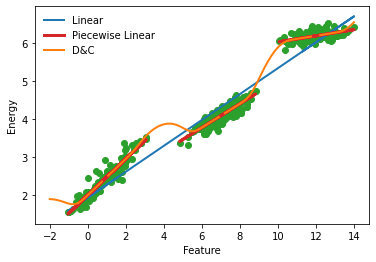

In [121]:
plt.scatter(x1, y1, c = 'tab:green')
plt.scatter(x2, y2, c = 'tab:green')
plt.scatter(x3, y3, c = 'tab:green')
plt.plot(x, y_lin, c = 'tab:blue', lw =2, label = 'Linear')
plt.plot(x1, y_lin1, c = 'tab:red', lw = 3, label = 'Piecewise Linear')
plt.plot(x2, y_lin2, c = 'tab:red', lw = 3)
plt.plot(x3, y_lin3, c = 'tab:red', lw = 3)
plt.plot(np.linspace(-2, 14, 100), preds, c = 'tab:orange', lw =2, label = 'D&C')
plt.ylabel("Energy")
plt.xlabel("Feature")
plt.legend(frameon=False)
plt.savefig("../toy_model_plot.pdf")